<a href="https://colab.research.google.com/github/jhou27/NLP_with_Python/blob/main/scrape_tweets_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycountry
!pip install langdetect
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
nltk.download('vader_lexicon')
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 20.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=7f4bb4a83ef937bf554fabfbb3cb6f96a4f5574fd61531e7a276f8c2ad1bae26
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 25.5 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=156295dfc05f96c6a964367104bf62ecf134f90fe386ff22aecea0c510a9bb03
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
with open("/content/drive/My Drive/coding/data/secret_t.txt") as f:
        secret_ls = f.readlines()
        consumer_key = secret_ls[0][:-1]
        consumer_secret = secret_ls[1][:-1]
        access_token = secret_ls[3][:-1]
        access_token_secret = secret_ls[4]

In [3]:
# Access Twitter Data
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [79]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword,lang='en').items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: Elon Musk
Please enter how many tweets to analyze: 1000


In [80]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  396
negative number:  327
neutral number:  277


In [81]:
tweet_list

,0
0,Elon musk thinks his ass is tony stark lmao
1,@FoodEureka I didn't answer because my persona...
2,"RT @jwhoopes2: One year ago, Elon Musk said he..."
3,RT @manilagirl48: @ProudElephantUS @robreiner ...
4,RT @SenWhitehouse: Headlines today say a lot:\...
...,...
995,RT @theblaze: Reporters are angry at Elon Musk...
996,"RT @edavies: Congrats, @elonmusk - you're now..."
997,@TheAstuteGaloot 💙💛💜💚🧡❤️Answer of revenue stre...
998,RT @JedediahBila: Why are so many left wingers...


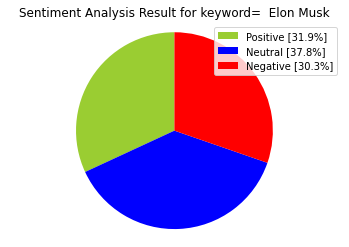

In [11]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [12]:
tweet_list.drop_duplicates(inplace = True)

#Extracting text values

In [48]:
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @CheriJacobus: Elon Musk's purchase of Twit...,RT @CheriJacobus: Elon Musk's purchase of Twit...,-0.100000,0.112500,neutral,0.000,1.000,0.000,0.0000
1,@JudiciaryGOP It is. But the neighborhood repu...,@JudiciaryGOP It is. But the neighborhood repu...,-0.155556,0.288889,neutral,0.000,1.000,0.000,0.0000
2,"RT @jwhoopes2: One year ago, Elon Musk said he...","RT @jwhoopes2: One year ago, Elon Musk said he...",-0.100000,0.100000,negative,0.187,0.742,0.070,-0.4588
3,RT @caslernoel: Elon Musk wouldn't be creating...,RT @caslernoel: Elon Musk wouldn't be creating...,0.000000,0.000000,positive,0.000,0.795,0.205,0.5994
4,RT @TonsTweetings: หลายคนคิดว่า Elon Musk ซื้อ...,RT @TonsTweetings: หลายคนคิดว่า Elon Musk ซื้อ...,0.033333,0.066667,neutral,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...
980,Elon Musk is an erratic billionaire who cares ...,Elon Musk is an erratic billionaire who cares ...,0.550000,0.750000,positive,0.000,0.850,0.150,0.4588
983,@BrandonStraka screw facebook thats why we hav...,@BrandonStraka screw facebook thats why we hav...,0.000000,0.000000,negative,0.123,0.877,0.000,-0.1027
987,"RT @donmoyn: New, from me: if you have been re...","RT @donmoyn: New, from me: if you have been re...",0.136364,0.454545,positive,0.000,0.894,0.106,0.3612
992,@revolcom91 @DSACostanza Is that why they’re c...,@revolcom91 @DSACostanza Is that why they’re c...,0.000000,0.400000,negative,0.318,0.682,0.000,-0.6808


In [49]:
#Cleaning Text (RT, Punctuation etc)

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(http\S+)"," ",x)
remove_EM = lambda x: re.sub('elon musk'," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list["text"] = tw_list.text.map(remove_EM)
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @CheriJacobus: Elon Musk's purchase of Twit...,s purchase of twitter is paid for by the sa...,-0.100000,0.112500,neutral,0.000,1.000,0.000,0.0000
1,@JudiciaryGOP It is. But the neighborhood repu...,it is but the neighborhood republicans who ...,-0.155556,0.288889,neutral,0.000,1.000,0.000,0.0000
2,"RT @jwhoopes2: One year ago, Elon Musk said he...",one year ago said he would give 6 billion...,-0.100000,0.100000,negative,0.187,0.742,0.070,-0.4588
3,RT @caslernoel: Elon Musk wouldn't be creating...,wouldn t be creating bots to help destabili...,0.000000,0.000000,positive,0.000,0.795,0.205,0.5994
4,RT @TonsTweetings: หลายคนคิดว่า Elon Musk ซื้อ...,twitter ...,0.033333,0.066667,neutral,0.000,1.000,0.000,0.0000
5,RT @AmandaMarcotte: Elon Musk is a massive mor...,is a massive moron but he keeps getting th...,-0.400000,1.000000,negative,0.369,0.498,0.133,-0.7269
7,RT @kdollsweety: Everyone should handle the at...,everyone should handle the attempt to be canc...,-0.250000,0.400000,neutral,0.100,0.800,0.100,0.0000
8,@elonmusk Elon Musk..what else?,what else,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
9,RT @Standard_Wealth: Bluesky Social แพลตฟอร์มโ...,bluesky social ...,0.033333,0.066667,neutral,0.000,1.000,0.000,0.0000
10,RT @MayoIsSpicyy: Elon Musk could’ve ended wor...,could ve ended world hunger for 6 billion ...,-0.100000,0.100000,negative,0.249,0.751,0.000,-0.7430


In [50]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @CheriJacobus: Elon Musk's purchase of Twit...,s purchase of twitter is paid for by the sa...,-0.100000,0.112500,neutral,0.000,1.000,0.000,0.0000
1,@JudiciaryGOP It is. But the neighborhood repu...,it is but the neighborhood republicans who ...,-0.155556,0.288889,neutral,0.000,1.000,0.000,0.0000
2,"RT @jwhoopes2: One year ago, Elon Musk said he...",one year ago said he would give 6 billion...,-0.100000,0.100000,negative,0.203,0.720,0.076,-0.4588
3,RT @caslernoel: Elon Musk wouldn't be creating...,wouldn t be creating bots to help destabili...,0.000000,0.000000,positive,0.000,0.776,0.224,0.5994
4,RT @TonsTweetings: หลายคนคิดว่า Elon Musk ซื้อ...,twitter ...,0.033333,0.066667,neutral,0.000,1.000,0.000,0.0000
5,RT @AmandaMarcotte: Elon Musk is a massive mor...,is a massive moron but he keeps getting th...,-0.400000,1.000000,negative,0.395,0.463,0.142,-0.7269
7,RT @kdollsweety: Everyone should handle the at...,everyone should handle the attempt to be canc...,-0.250000,0.400000,neutral,0.109,0.783,0.109,0.0000
8,@elonmusk Elon Musk..what else?,what else,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
9,RT @Standard_Wealth: Bluesky Social แพลตฟอร์มโ...,bluesky social ...,0.033333,0.066667,neutral,0.000,1.000,0.000,0.0000
10,RT @MayoIsSpicyy: Elon Musk could’ve ended wor...,could ve ended world hunger for 6 billion ...,-0.100000,0.100000,negative,0.270,0.730,0.000,-0.7430


In [51]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [52]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [53]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,205,40.28
positive,168,33.01
negative,136,26.72


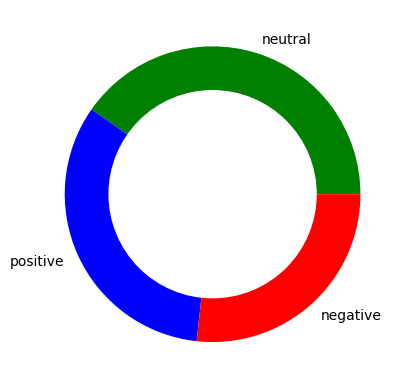

In [54]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [56]:
#Function to Create Wordcloud

def create_wordcloud(text):
    #mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  #mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    # wc.to_file("wc.png")
    #print("Word Cloud Saved Successfully")
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    #return wc
    #path="wc.png"
    #display(Image.open(wc))

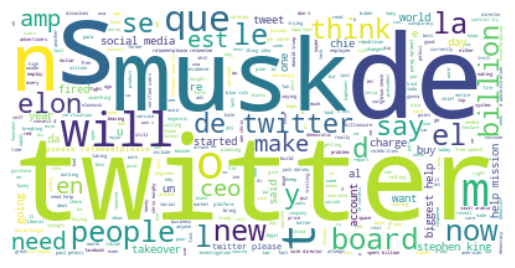

In [57]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

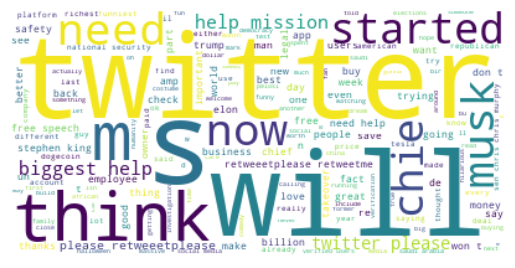

In [58]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

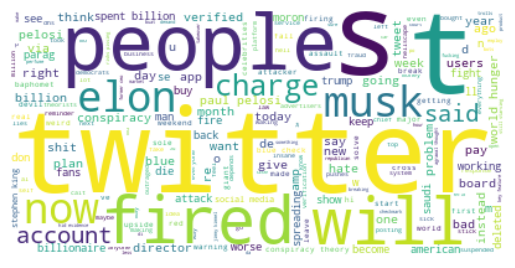

In [59]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

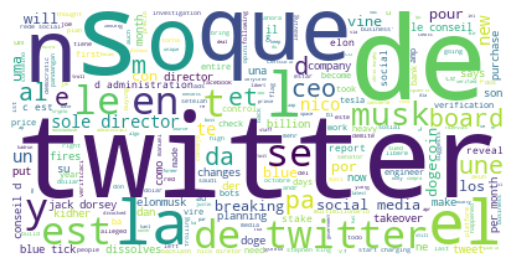

In [60]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [61]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [62]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,98.29
neutral,84.35
positive,99.08


In [63]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,17.29
neutral,13.25
positive,17.22


In [64]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [65]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [66]:
tw_list

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized
0,RT @CheriJacobus: Elon Musk's purchase of Twit...,s purchase of twitter is paid for by the sa...,-0.100000,0.112500,neutral,0.000,1.000,0.000,0.0000,114,22,s purchase of twitter is paid for by the sa...,"[, s, purchase, of, twitter, is, paid, for, by..."
1,@JudiciaryGOP It is. But the neighborhood repu...,it is but the neighborhood republicans who ...,-0.155556,0.288889,neutral,0.000,1.000,0.000,0.0000,106,19,it is but the neighborhood republicans who ...,"[, it, is, but, the, neighborhood, republicans..."
2,"RT @jwhoopes2: One year ago, Elon Musk said he...",one year ago said he would give 6 billion...,-0.100000,0.100000,negative,0.203,0.720,0.076,-0.4588,118,21,one year ago said he would give billion ...,"[, one, year, ago, said, he, would, give, bill..."
3,RT @caslernoel: Elon Musk wouldn't be creating...,wouldn t be creating bots to help destabili...,0.000000,0.000000,positive,0.000,0.776,0.224,0.5994,121,21,wouldn t be creating bots to help destabili...,"[, wouldn, t, be, creating, bots, to, help, de..."
4,RT @TonsTweetings: หลายคนคิดว่า Elon Musk ซื้อ...,twitter ...,0.033333,0.066667,neutral,0.000,1.000,0.000,0.0000,107,3,twitter ...,"[, twitter, social, media, ]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,Elon Musk is an erratic billionaire who cares ...,is an erratic billionaire who cares more abo...,0.550000,0.750000,positive,0.000,0.833,0.167,0.4588,110,16,is an erratic billionaire who cares more abo...,"[, is, an, erratic, billionaire, who, cares, m..."
983,@BrandonStraka screw facebook thats why we hav...,screw facebook thats why we have now ownin...,0.000000,0.000000,negative,0.149,0.851,0.000,-0.1027,55,9,screw facebook thats why we have now ownin...,"[, screw, facebook, thats, why, we, have, now,..."
987,"RT @donmoyn: New, from me: if you have been re...",new from me if you have been reserving judg...,0.136364,0.454545,positive,0.000,0.894,0.106,0.3612,127,23,new from me if you have been reserving judg...,"[, new, from, me, if, you, have, been, reservi..."
992,@revolcom91 @DSACostanza Is that why they’re c...,is that why they re currently throwing a t...,0.000000,0.400000,negative,0.359,0.641,0.000,-0.6808,89,14,is that why they re currently throwing a t...,"[, is, that, why, they, re, currently, throwin..."


In [68]:
#Removing stopwords
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [69]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [70]:
tw_list

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @CheriJacobus: Elon Musk's purchase of Twit...,s purchase of twitter is paid for by the sa...,-0.100000,0.112500,neutral,0.000,1.000,0.000,0.0000,114,22,s purchase of twitter is paid for by the sa...,"[, s, purchase, of, twitter, is, paid, for, by...","[, purchase, twitter, paid, country, planes, t...","[, purchas, twitter, paid, countri, plane, twi..."
1,@JudiciaryGOP It is. But the neighborhood repu...,it is but the neighborhood republicans who ...,-0.155556,0.288889,neutral,0.000,1.000,0.000,0.0000,106,19,it is but the neighborhood republicans who ...,"[, it, is, but, the, neighborhood, republicans...","[, neighborhood, republicans, flew, flag, upsi...","[, neighborhood, republican, flew, flag, upsid..."
2,"RT @jwhoopes2: One year ago, Elon Musk said he...",one year ago said he would give 6 billion...,-0.100000,0.100000,negative,0.203,0.720,0.076,-0.4588,118,21,one year ago said he would give billion ...,"[, one, year, ago, said, he, would, give, bill...","[, one, year, ago, said, would, give, billion,...","[, one, year, ago, said, would, give, billion,..."
3,RT @caslernoel: Elon Musk wouldn't be creating...,wouldn t be creating bots to help destabili...,0.000000,0.000000,positive,0.000,0.776,0.224,0.5994,121,21,wouldn t be creating bots to help destabili...,"[, wouldn, t, be, creating, bots, to, help, de...","[, creating, bots, help, destabilize, democrac...","[, creat, bot, help, destabil, democraci, braz..."
4,RT @TonsTweetings: หลายคนคิดว่า Elon Musk ซื้อ...,twitter ...,0.033333,0.066667,neutral,0.000,1.000,0.000,0.0000,107,3,twitter ...,"[, twitter, social, media, ]","[, twitter, social, media, ]","[, twitter, social, media, ]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,Elon Musk is an erratic billionaire who cares ...,is an erratic billionaire who cares more abo...,0.550000,0.750000,positive,0.000,0.833,0.167,0.4588,110,16,is an erratic billionaire who cares more abo...,"[, is, an, erratic, billionaire, who, cares, m...","[, erratic, billionaire, cares, cementing, pow...","[, errat, billionair, care, cement, power, pro..."
983,@BrandonStraka screw facebook thats why we hav...,screw facebook thats why we have now ownin...,0.000000,0.000000,negative,0.149,0.851,0.000,-0.1027,55,9,screw facebook thats why we have now ownin...,"[, screw, facebook, thats, why, we, have, now,...","[, screw, facebook, thats, owning, tweeter]","[, screw, facebook, that, own, tweeter]"
987,"RT @donmoyn: New, from me: if you have been re...",new from me if you have been reserving judg...,0.136364,0.454545,positive,0.000,0.894,0.106,0.3612,127,23,new from me if you have been reserving judg...,"[, new, from, me, if, you, have, been, reservi...","[, new, reserving, judgment, musk, would, like...","[, new, reserv, judgment, musk, would, like, l..."
992,@revolcom91 @DSACostanza Is that why they’re c...,is that why they re currently throwing a t...,0.000000,0.400000,negative,0.359,0.641,0.000,-0.6808,89,14,is that why they re currently throwing a t...,"[, is, that, why, they, re, currently, throwin...","[, currently, throwing, temper, tantrum, buyin...","[, current, throw, temper, tantrum, buy, twitt..."


In [71]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [72]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @CheriJacobus: Elon Musk's purchase of Twit...,s purchase of twitter is paid for by the sa...,-0.100000,0.112500,neutral,0.000,1.000,0.000,0.0000,114,22,s purchase of twitter is paid for by the sa...,"[, s, purchase, of, twitter, is, paid, for, by...","[, purchase, twitter, paid, country, planes, t...","[, purchas, twitter, paid, countri, plane, twi..."
1,@JudiciaryGOP It is. But the neighborhood repu...,it is but the neighborhood republicans who ...,-0.155556,0.288889,neutral,0.000,1.000,0.000,0.0000,106,19,it is but the neighborhood republicans who ...,"[, it, is, but, the, neighborhood, republicans...","[, neighborhood, republicans, flew, flag, upsi...","[, neighborhood, republican, flew, flag, upsid..."
2,"RT @jwhoopes2: One year ago, Elon Musk said he...",one year ago said he would give 6 billion...,-0.100000,0.100000,negative,0.203,0.720,0.076,-0.4588,118,21,one year ago said he would give billion ...,"[, one, year, ago, said, he, would, give, bill...","[, one, year, ago, said, would, give, billion,...","[, one, year, ago, said, would, give, billion,..."
3,RT @caslernoel: Elon Musk wouldn't be creating...,wouldn t be creating bots to help destabili...,0.000000,0.000000,positive,0.000,0.776,0.224,0.5994,121,21,wouldn t be creating bots to help destabili...,"[, wouldn, t, be, creating, bots, to, help, de...","[, creating, bots, help, destabilize, democrac...","[, creat, bot, help, destabil, democraci, braz..."
4,RT @TonsTweetings: หลายคนคิดว่า Elon Musk ซื้อ...,twitter ...,0.033333,0.066667,neutral,0.000,1.000,0.000,0.0000,107,3,twitter ...,"[, twitter, social, media, ]","[, twitter, social, media, ]","[, twitter, social, media, ]"


In [73]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

509 Number of reviews has 2239 words


In [74]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,aap,abbonamento,aber,abicim,abil,abl,abonn,acaba,acc,...,zekaya,zengin,zero,zg,zijn,znie,zu,zuckerberg,zur,zyaada
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
twitter,242
de,72
musk,30
n,28
help,27
need,24
peopl,23
que,23
le,21
social,21


In [76]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [77]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('stephen king', 13),
 ('social media', 12),
 ('need biggest', 10),
 ('biggest help', 10),
 ('help mission', 10),
 ('mission started', 10),
 ('started twitter', 10),
 ('twitter retweeetplease', 10),
 ('retweeetplease retweetme', 10),
 ('retweetme need', 10),
 ('need help', 10),
 ('help chie', 10),
 ('twitter board', 10),
 ('sole director', 9),
 ('44 billion', 8),
 ('paul pelosi', 8),
 ('free speech', 7),
 ('20 month', 7),
 ('world hunger', 6),
 ('chris murphy', 6)]

In [78]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('need biggest help', 10),
 ('biggest help mission', 10),
 ('help mission started', 10),
 ('mission started twitter', 10),
 ('started twitter retweeetplease', 10),
 ('twitter retweeetplease retweetme', 10),
 ('retweeetplease retweetme need', 10),
 ('retweetme need help', 10),
 ('need help chie', 10),
 ('spent 44 billion', 5),
 ('sen chris murphy', 5),
 ('20 month verification', 4),
 ('le conseil administration', 4),
 ('board sole director', 4),
 ('sole director twitter', 3),
 ('social media giant', 3),
 ('social media platform', 3),
 ('chris murphy calling', 3),
 ('start charging 20', 3),
 ('charging 20 month', 3)]